# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



In [3]:
# Print the city count to confirm sufficient count
print(f'There are {len(cities)} cities in the list')

There are 590 cities in the list


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# build df
city_df = pd.DataFrame(cities)
city_df.columns=["City"]
city_df["Lat"]=""
city_df["Lng"]=""
city_df["Max_Temp"]=""
city_df["Humidity"]=""
city_df["Cloudiness"]=""
city_df["Wind_Speed"]=""
city_df["Country"]=""
city_df["Date"]=""

city_df = city_df.set_index("City")

city_df.head()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City,,,,,,,,
andrews,,,,,,,,
mineiros,,,,,,,,
severo-kurilsk,,,,,,,,
mataura,,,,,,,,
lakselv,,,,,,,,


In [5]:
# example url from the API docs: api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
count=0
for city in cities:

    #todo if need different unit of measure on temp need to update the units passed to the url
    weather_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}'


    print(f"Log - call {count} for {city}")
    weather_resp=requests.get(weather_url).json()
#    print(weather_resp["main"]["temp_max"])
    count+=1
    try:
        city_df.loc[city,"Lat"]=weather_resp["coord"]["lat"]
        city_df.loc[city,"Lng"]=weather_resp["coord"]["lon"]
        city_df.loc[city,"Max_Temp"]=weather_resp["main"]["temp_max"]
        city_df.loc[city,"Humidity"]=weather_resp["main"]["humidity"]
        city_df.loc[city,"Cloudiness"]=weather_resp["clouds"]["all"]
        city_df.loc[city,"Wind_Speed"]=weather_resp["wind"]["speed"]
        city_df.loc[city,"Country"]=weather_resp["sys"]["country"]
        city_df.loc[city,"Date"]=weather_resp["dt"]
    except:
        print(f"Issue with city {city}.", end=" ")  #change end so it's not a new line
        city_df.loc[city,"Lat"]="NoDataFound"
        try:
            print("API message: "+weather_resp["message"])  #if the API returned an error it'll be here
        except:
            print(" ")   #if no message data found, print something to get a newline for next log statement

#    break  #break used during testing to setup df population w/just 
    # Add a sleep interval between queries to stay within API query limits
    time.sleep(1)
  

Log - call 0 for andrews
Log - call 1 for mineiros
Log - call 2 for severo-kurilsk
Log - call 3 for mataura
Log - call 4 for lakselv
Log - call 5 for ushuaia
Log - call 6 for gushikawa
Log - call 7 for sao joao da barra
Log - call 8 for qaanaaq
Log - call 9 for hermanus
Log - call 10 for port alfred
Log - call 11 for vaini
Log - call 12 for nikolskoye
Log - call 13 for atuona
Log - call 14 for yellowknife
Log - call 15 for saskylakh
Log - call 16 for illoqqortoormiut
Issue with city illoqqortoormiut. API message: city not found
Log - call 17 for batouri
Log - call 18 for bredasdorp
Log - call 19 for dalianwan
Log - call 20 for san andres
Log - call 21 for umzimvubu
Issue with city umzimvubu. API message: city not found
Log - call 22 for bluff
Log - call 23 for san cristobal
Log - call 24 for new norfolk
Log - call 25 for los llanos de aridane
Log - call 26 for rikitea
Log - call 27 for barrow
Log - call 28 for agirish
Log - call 29 for puerto ayora
Log - call 30 for jamestown
Log - cal

Log - call 253 for alofi
Log - call 254 for lima
Log - call 255 for kobryn
Log - call 256 for presidencia roque saenz pena
Log - call 257 for bilibino
Log - call 258 for bathsheba
Log - call 259 for krasnyy chikoy
Log - call 260 for pieve di soligo
Log - call 261 for shingu
Log - call 262 for athabasca
Log - call 263 for balikpapan
Log - call 264 for kalawit
Log - call 265 for limbang
Log - call 266 for keetmanshoop
Log - call 267 for maldonado
Log - call 268 for tiksi
Log - call 269 for griffith
Log - call 270 for waingapu
Log - call 271 for eenhana
Log - call 272 for aksarka
Log - call 273 for niquero
Log - call 274 for sinfra
Log - call 275 for labuhan
Log - call 276 for lebu
Log - call 277 for saldanha
Log - call 278 for takoradi
Log - call 279 for ushtobe
Log - call 280 for karratha
Log - call 281 for hamilton
Log - call 282 for pangnirtung
Log - call 283 for longyearbyen
Log - call 284 for mount hagen
Log - call 285 for margate
Log - call 286 for kamenskoye
Issue with city kamens

Issue with city petrolandia. API message: city not found
Log - call 505 for yermakovskoye
Log - call 506 for iqaluit
Log - call 507 for mitchell
Log - call 508 for manzanillo
Log - call 509 for killam
Log - call 510 for abu dhabi
Log - call 511 for ginir
Log - call 512 for vila velha
Log - call 513 for tiznit
Log - call 514 for aklavik
Log - call 515 for zeya
Log - call 516 for changli
Log - call 517 for salekhard
Log - call 518 for laela
Log - call 519 for sangar
Log - call 520 for omsukchan
Log - call 521 for hasaki
Log - call 522 for ahuimanu
Log - call 523 for yabassi
Log - call 524 for kotri
Log - call 525 for hailey
Log - call 526 for maragogi
Log - call 527 for kushiro
Log - call 528 for cubuk
Log - call 529 for puerto leguizamo
Log - call 530 for yugo-kamskiy
Log - call 531 for eyl
Log - call 532 for taboga
Log - call 533 for kultuk
Log - call 534 for paralimni
Log - call 535 for vila
Log - call 536 for trinidad
Log - call 537 for kutum
Log - call 538 for camacha
Log - call 539

### Clean up the DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#remove the rows where the city wasn't found by the weather api
city_df=city_df.loc[city_df["Lat"]!='NoDataFound']

#redo the index so there's a continous number iterator for the first value of each row of the csv
city_df = city_df.reset_index()
city_df.index.name="City_ID"

In [7]:
# reindexed 2x so need to drop unneeded column
#del city_df["City_ID"]

# reorder columns
city_df=city_df[["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max_Temp","Wind_Speed"]]
city_df.to_csv("../output_data/cities.csv", index=True)

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
City_ID,,,,,,,,,
0,andrews,90,US,1613008409,100,32.3187,-102.546,26.6,13.8
1,mineiros,100,BR,1613008374,95,-17.5694,-52.5511,66.24,3.04
2,severo-kurilsk,100,RU,1613008239,91,50.6789,156.125,28,19.55
3,mataura,100,NZ,1613008162,87,-46.1927,168.864,50.25,13.06
4,lakselv,90,NO,1613008413,86,70.0513,24.9718,19.4,4.61


In [8]:
city_df.shape

(545, 9)

In [23]:
backupcity_df=city_df  #just in case
backupcity_df.shape

(545, 9)

In [27]:
aggSummStats = city_df[["Lat","Lng","Max_Temp","Humidity","Cloudiness","Wind_Speed","Date"]].agg(["count","mean","std","min"#,"std","sem","sem"   #need to add quartile stuff here
                            ,"max"])
#dtype is 'object' as returned by api convert to float
city_df = city_df[["Lat","Lng","Max_Temp","Humidity","Cloudiness","Wind_Speed","Date"]].apply(pd.to_numeric, downcast='float', errors='coerce')

quantiles = city_df[["Lat","Lng","Max_Temp","Humidity","Cloudiness","Wind_Speed","Date"]].quantile([.25,.5,.75])

In [29]:
summStats=aggSummStats.append(quantiles)
# another way to get stats: city_df.describe().T 

summStats

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,20.567030,21.614746,46.930782,74.251373,51.469727,7.689468,1.613017e+09
std,33.717472,91.230385,33.519405,19.042740,40.424416,6.183187,8.633372e+03
min,-54.799999,-179.166702,-34.599998,13.000000,0.000000,0.160000,1.613008e+09
max,78.218597,178.416702,100.000000,100.000000,100.000000,38.320000,1.613009e+09
0.25,-7.738000,-60.145802,23.000000,66.000000,5.000000,3.400000,1.613009e+09
0.5,25.500000,22.957300,60.419998,79.000000,53.000000,5.750000,1.613009e+09
0.75,48.983299,105.922798,74.589996,88.000000,93.000000,10.490000,1.613009e+09


In [56]:
#save the date this is run to be used in the graph titles
api_run_date = date.today().strftime("%b-%d-%Y")

print(api_run_date)

Feb-10-2021


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
#max Humitidy shown in summStats is 100% no values over so no cities to remove.

## Plotting the Data


## Latitude vs. Temperature Plot

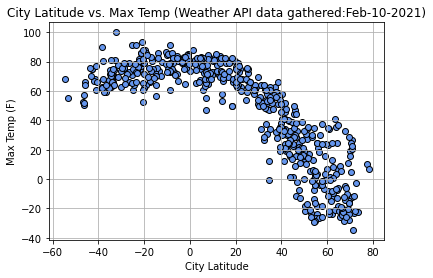

In [67]:
date= city_df.loc[0,"Date"]
cityLats = city_df.Lat
cityMaxTemps = city_df.Max_Temp
plt.scatter(cityLats,cityMaxTemps,marker="o",edgecolors="black", facecolors="cornflowerblue")
plt.title(f"City Latitude vs. Max Temp (Weather API data gathered:{api_run_date})")  
plt.xlabel("City Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)
#plt.xlim(14, 26)
#plt.ylim(34, 47)
plt.savefig('../output_data/cityLat_vs_MaxTemp.png')
plt.show()

Lat vs Temp shows as you get closer to the equator (Lat 0) temp goes up.  As you travel north (positive latitude) temp goes down.  Nothern hemiphere, currently in winter, shows lower max temps as you go north away from the equator.

## Latitude vs. Humidity Plot

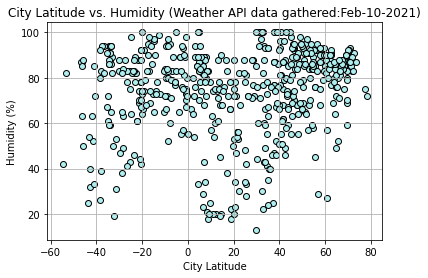

In [68]:
plt.scatter(cityLats,city_df.Humidity,marker="o",edgecolors="black", facecolors="paleturquoise")
plt.title(f"City Latitude vs. Humidity (Weather API data gathered:{api_run_date})")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig('../output_data/cityLat_vs_Humidity.png')
plt.show()

Latitide vs Humidity shows no strong correlation.  Would need to do more research to determine what attribute of a location  correlates with humidity levels.

## Latitude vs. Cloudiness Plot

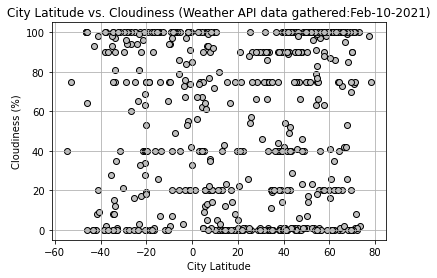

In [70]:
plt.scatter(cityLats,city_df.Cloudiness,marker="o",edgecolors="black", facecolors="silver")
plt.title(f"City Latitude vs. Cloudiness (Weather API data gathered:{api_run_date})")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig('../output_data/cityLat_vs_Cloudiness.png')
plt.show()

Latitude vs Cloudiness shows no real correlation between the two.  Values grouping along whole numbers could be due to less perfect scientific method of gathering "cloudiness" data.  I wasn't able to determine the exact method used to determine the value by weather stations, but the data shows rounding to whole numbers is common.  

## Latitude vs. Wind Speed Plot

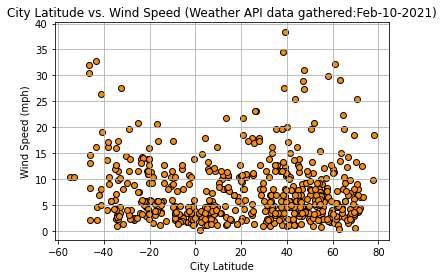

In [71]:
plt.scatter(cityLats,city_df.Wind_Speed,marker="o",edgecolors="black", facecolors="darkorange")
plt.title(f"City Latitude vs. Wind Speed (Weather API data gathered:{api_run_date})")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig('../output_data/cityLat_vs_Wind.png')
plt.show()

Graphing Latitude vs Wind Speed shows scattering values with no dependency between the two.  Would need further research to determine if there were aspects of location that affect wind speed (altitude? proximity to change in geography like mountain or ocean?)

## Linear Regression

In [72]:
northern_cities=city_df.loc[city_df.Lat>=0]
southern_cities=city_df.loc[city_df.Lat< 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

rValue: -0.8716066206093471


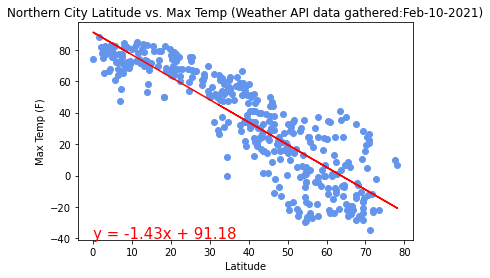

In [73]:
northx_axis=northern_cities.Lat
plt.scatter(northx_axis,northern_cities.Max_Temp,marker="o", facecolors="cornflowerblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northx_axis,northern_cities.Max_Temp)

print(f'rValue: {rvalue}')
#eq of a line y=mx+b
regress_values = slope*northx_axis  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")


plt.title(f"Northern City Latitude vs. Max Temp (Weather API data gathered:{api_run_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig('../output_data/northLat_vs_MaxTemp.png')
plt.show()

Graph displays strong negative correlation.  In the northern hemisphere, as latitude goes up (traveling North away from the equator), the temperature goes down.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

rValue: 0.4675847118249704


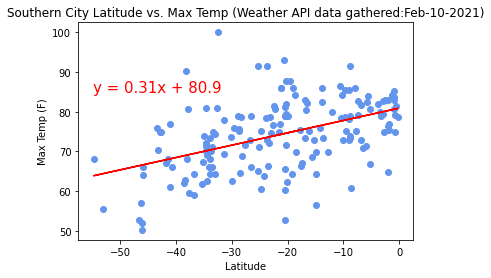

In [74]:
southx_axis=southern_cities.Lat
plt.scatter(southx_axis,southern_cities.Max_Temp,marker="o", facecolors="cornflowerblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southx_axis,southern_cities.Max_Temp)

print(f'rValue: {rvalue}')
#eq of a line y=mx+b
regress_values = slope*southx_axis  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southx_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")


plt.title(f"Southern City Latitude vs. Max Temp (Weather API data gathered:{api_run_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig('../output_data/southLat_vs_MaxTemp.png')
plt.show()

Plot shows a less strong temp to latitude correlation when compared to the northern hemisphere cities (.47 vs .87)
There's some positive correlation in the southern hemisphere as you travel towards the equator the temperature rises.  This hemisphere's data shows more variance than the northern hemisphere data. While developing this notebook, multiple runs of random datasets gave norther hemisphere rvalues in .8X range, however southern hemisphere data has varied from .4X to .6X.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rValue: 0.319795039308472


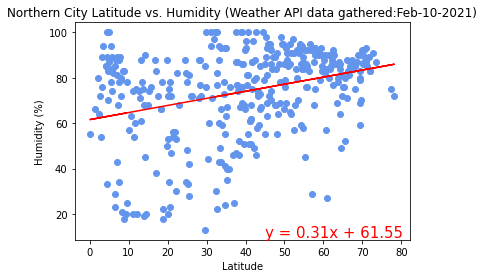

In [75]:
plt.scatter(northx_axis,northern_cities.Humidity,marker="o", facecolors="cornflowerblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northx_axis,northern_cities.Humidity)

print(f'rValue: {rvalue}')
#eq of a line y=mx+b
regress_values = slope*northx_axis  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northx_axis,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")


plt.title(f"Northern City Latitude vs. Humidity (Weather API data gathered:{api_run_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('../output_data/northLat_vs_Humidity.png')
plt.show()

Weak positive correlation shown in this graph.   Slightly higher r value compared with the southern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rValue: 0.2661608048662003


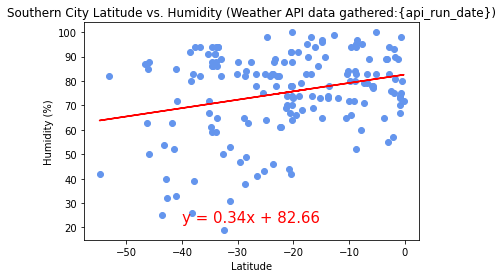

In [76]:

plt.scatter(southx_axis,southern_cities.Humidity,marker="o", facecolors="cornflowerblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southx_axis,southern_cities.Humidity)

print(f'rValue: {rvalue}')
#eq of a line y=mx+b
regress_values = slope*southx_axis  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southx_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,22),fontsize=15,color="red")


plt.title("Southern City Latitude vs. Humidity (Weather API data gathered:{api_run_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.savefig('../output_data/southLat_vs_Humidity.png')
plt.show()

Weak positive correlation show between southern latitude and humidity.  As noted in the Humidity graph containing both hemispheres, would need to do further research to determine a different attribute that more strongly correlates to humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rValue: 0.16160433173528962


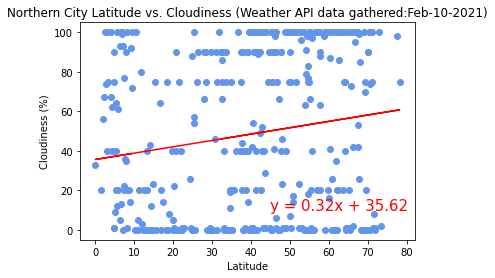

In [77]:
plt.scatter(northx_axis,northern_cities.Cloudiness,marker="o", facecolors="cornflowerblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northx_axis,northern_cities.Cloudiness)

print(f'rValue: {rvalue}')
#eq of a line y=mx+b
regress_values = slope*northx_axis  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northx_axis,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")


plt.title(f"Northern City Latitude vs. Cloudiness (Weather API data gathered:{api_run_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('../output_data/northLat_vs_Clouds.png')
plt.show()

When separated in to north and south, there is _extremely_ weak correlation between latitude and cloudiness. R value .1X for both hemispheres.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rValue: 0.1892121268143975


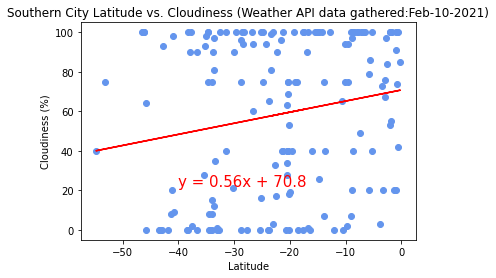

In [78]:
plt.scatter(southx_axis,southern_cities.Cloudiness,marker="o", facecolors="cornflowerblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southx_axis,southern_cities.Cloudiness)

print(f'rValue: {rvalue}')
#eq of a line y=mx+b
regress_values = slope*southx_axis  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southx_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,22),fontsize=15,color="red")


plt.title(f"Southern City Latitude vs. Cloudiness (Weather API data gathered:{api_run_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.savefig('../output_data/southLat_vs_Clouds.png')
plt.show()

Would need to do further research on if a location attribute beyond latitude would show a correlation to cloudiness.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rValue: 0.06408183105028496


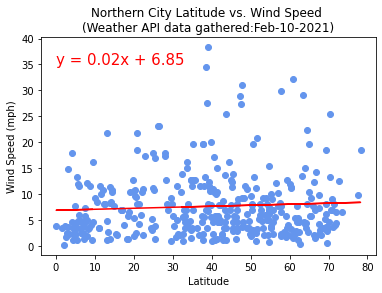

In [82]:
plt.scatter(northx_axis,northern_cities.Wind_Speed,marker="o", facecolors="cornflowerblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northx_axis,northern_cities.Wind_Speed)

print(f'rValue: {rvalue}')
#eq of a line y=mx+b
regress_values = slope*northx_axis  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")


plt.title(f"Northern City Latitude vs. Wind Speed \n(Weather API data gathered:{api_run_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('../output_data/northLat_vs_Wind.png')
plt.show()

Latitude vs Windspeed show no correlation.  Confirmed by low r value of .06

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rValue: -0.3602350460082833


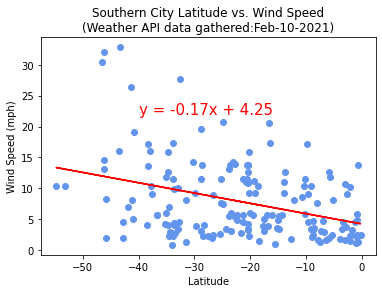

In [83]:
plt.scatter(southx_axis,southern_cities.Wind_Speed,marker="o", facecolors="cornflowerblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southx_axis,southern_cities.Wind_Speed)

print(f'rValue: {rvalue}')
#eq of a line y=mx+b
regress_values = slope*southx_axis  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southx_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,22),fontsize=15,color="red")


plt.title(f"Southern City Latitude vs. Wind Speed\n(Weather API data gathered:{api_run_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.savefig('../output_data/southLat_vs_Wind.png')
plt.show()

Southern latitude vs. wind seems to show a weak negative correlation. This is not a reproducible correlation, other runs of data returned pvalues like -.10